In [4]:
import cv2, os
import numpy as np
from sklearn.model_selection import train_test_split
from ThresholdModel import ThresholdModel

In [5]:
images_path = os.path.join(os.getcwd(), 'dataset/ImageSets/')
annotations_path = os.path.join(os.getcwd(), 'dataset/SegmentationClass/')

images_name = os.listdir(images_path)
annotations_name = os.listdir(annotations_path)

images_name_train, images_name_test, annotations_name_train, annotations_name_test = train_test_split(images_name, annotations_name, train_size=0.8)

In [6]:
model = ThresholdModel(images_path, annotations_path)
model.add_label('DiaChua', [255, 221, 51])
model.add_label('VungVoKhuan', [102, 255, 102])
model.add_label('GiayKhangSinh', [240, 120, 240])

model.fit(images_name_train, annotations_name_train)

DiaChua [64.65621124695028, 70.24435698049416, 75.82849403588062] [123.37369530273676, 133.06562425752062, 143.03139251489134]
VungVoKhuan [53.25589488219424, 57.7151480797746, 60.77221886124428] [82.16584927307309, 86.36926618709875, 90.53873281333804]
GiayKhangSinh [149.52248205879496, 154.92344283313784, 162.0026267722676] [229.4937093522739, 234.70506782474527, 241.7676038901124]


In [7]:
images_test = []
annotations_test = []
    
for image_name in images_name_test:
    images_test.append(cv2.imread(os.path.join(images_path, image_name)))

for annotation_name in annotations_name_test:
    annotations_test.append(cv2.imread(os.path.join(annotations_path, annotation_name)))

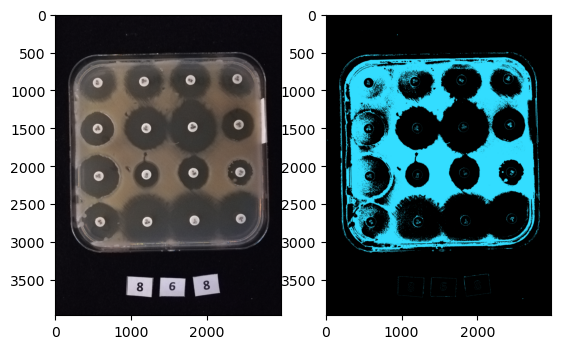

In [10]:
import matplotlib.pyplot as plt

mask = model.predict(images_test[0], 'DiaChua')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images_test[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))